# Gillespie Algorithm

In [1]:
from random import choices, expovariate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
"""
Stochastic chemical reaction: Gillespie Algorithm
Adapted from: Chemical and Biomedical Enginnering Calculations Using Python Ch.4-3
Reaction of A <-> B with rate constants k1 & k2
"""
class Gillespie():
    def __init__(self, propensityFuncs, actionFuncs, parameters=None):
        self.propensityFuncs = propensityFuncs
        self.actionFuncs = actionFuncs
        self.parameters = parameters
    def run(self, u0, tend, tstart=0):
        # Setup
        t = tstart
        p = self.parameters
        u = np.asarray(u0)
        us = [u.copy()]
        ts = [t]
        while t < tend:
            # propensities of reactions
            ps = [f(u, p, t) for f in self.propensityFuncs]
            pTotal = sum(ps)
            dt = expovariate(pTotal)
            # Choose an action by the weight of each propensities, and update the state variable
            act = choices(actionFuncs, weights=ps)[0]
            u = np.asarray(act(u, p, t))
            t += dt
            us.append(u.copy())
            ts.append(t)
        return np.array(ts), np.array(us)

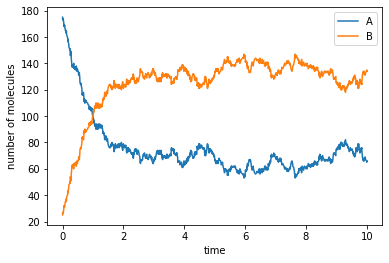

In [3]:
parameters = {"k1": 1.0, "k2": 0.5}
propensityFuncs = (lambda u, p, t: p["k1"] * u[0], 
                   lambda u, p, t: p["k2"] * u[1])
actionFuncs = (lambda u, p, t: [u[0] - 1, u[1] + 1], 
               lambda u, p, t: [u[0] + 1, u[1] - 1])
ssa = Gillespie(propensityFuncs = propensityFuncs,
                actionFuncs = actionFuncs,
                parameters = parameters)
ts, us = ssa.run([175, 25], 10.0)

fig, ax = plt.subplots()
ax.plot(ts, us[:, 0], label="A")
ax.plot(ts, us[:, 1], label="B")
ax.set_xlabel('time')
ax.set_ylabel('number of molecules')
ax.legend(loc='best')